<a href="https://colab.research.google.com/github/ctrejom/IA-Tareas/blob/main/Tarea2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
#CARLOS DAVID TREJO MEJIA
#20212000569
import pandas as pd

df = pd.read_csv('./housing.csv')

In [289]:
#ver datos del df original
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [290]:
#Limitar el DF

#df limitado, el valor maximo de las casas sera de 50
dflim = df.copy() #Creamos una copia para que el df original no se cambie

#Si una casa tiene 50 años o más, el dato indica 50.
dflim['housing_median_age'] = dflim['housing_median_age'].apply(lambda x: x if x < 50 else 50)

#Si el precio de una casa es 500,000 o más, el dato indica 500,000.
dflim['median_house_value'] = dflim['median_house_value'].apply(lambda x: x if x < 500000 else 500000)

#Ingresos con un maximo de 15
dflim['median_income'] = dflim['median_income'].apply(lambda x: x if x < 15 else 15)

In [291]:
#Convertir la columna de proximidad al oceano en una columna numerica usnado dumies

#Creamos las variables dummy
dumies_ocean = pd.get_dummies(dflim['ocean_proximity'], dtype=int)

#Unimos los dataframes (Se concatenaron las variables dummy al DataFrame dflim)
dflim = pd.concat([dflim, dumies_ocean], axis=1)

#Mostramos las primeras filas
dflim.head() #Como aparece la columna ocean_proximitu y concataremos sus valores, la eliminamos

#borramos la columna que tiene texto
dflim.drop('ocean_proximity', axis=1, inplace=True)

#Eliminamos Nulos
dflim.dropna(inplace=True)

In [292]:
#Creamos nuevas caracteristicas

#Cuántas habitaciones hay por cada dormitorio
#Si una casa tiene muchos cuartos pero pocos dormitorios, puede ser más lujosa o espaciosa.
dflim['bedroom_ratio'] = dflim['total_rooms'] / dflim['total_bedrooms']

#Valor promedio del valor de la casa y el ingreso
#Valor de la vivienda y el ingreso medio de la zona
dflim['median_house_value_per_median_income'] = dflim['median_house_value'] / dflim['median_income']

#Cuartos por Hogares (Asi poemos ver cuantos cuartos tiene la casa)
#Cuantos cuartos tiene en promedio la casa
dflim['rooms_per_household'] = dflim['total_rooms'] / dflim['households']

#Poblacion por hogar (Cuantas personas viven en promedio en una casa)
#Una casa con mucha gente puede hacer que su valor disminuya
dflim['population_per_household'] = dflim['population'] / dflim['households']

#Cuartos personales por habitacion (Cuantos cuartos personales tiene la casa(no incluye salas, cocina, etc.))
dflim['bedrooms_per_room'] = dflim['total_bedrooms'] / dflim['total_rooms']

#Ingreso medio por hogar (Cuanto ganan las personas por hogar)
dflim['income_per_household'] = dflim['median_income'] / dflim['households']

#Ingreso mediante la poblcacion
#Ingreso medio de la poblacion de la zona
dflim['income_per_population'] = dflim['median_income'] / dflim['population']

#Valor promedio de la habitacion
#Cuanto vale cada habitacion de la casa
dflim['house_value_per_room'] = dflim['median_house_value'] / dflim['total_rooms']

#Cuantas personas hay por habitación.
dflim['population_per_room'] = dflim['population'] / dflim['total_rooms']

#Ingreso por cuarto
dflim['income_per_room'] = dflim['median_income'] / dflim['total_rooms']

#Edad de la vivienda normalizada por ingreso
dflim['age_per_income'] = dflim['housing_median_age'] / dflim['median_income']

#Edad media de la vivienda por numero de personas en el hogar.
dflim['age_per_population_per_household'] = dflim['housing_median_age'] / dflim['population_per_household']

#Ingreso medio entre la poblacion en un hogar
dflim['income_per_population_per_household'] = dflim['median_income'] / dflim['population_per_household']

#Valor promedio de la habitacion por cada dormitorio
dflim['house_value_per_bedroom_ratio'] = dflim['median_house_value'] / dflim['bedroom_ratio']

dflim.head() #Confirmamos que la caracterisitca exita viendo el data frame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,...,bedrooms_per_room,income_per_household,income_per_population,house_value_per_room,population_per_room,income_per_room,age_per_income,age_per_population_per_household,income_per_population_per_household,house_value_per_bedroom_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,...,0.146591,0.066073,0.025855,514.318182,0.365909,0.009460,4.924807,16.043478,3.257687,66347.045455
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,...,0.155797,0.007295,0.003457,50.500070,0.338217,0.001169,2.529694,9.953353,3.934608,55853.077898
2,-122.24,37.85,50.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,...,0.129516,0.041002,0.014632,240.013633,0.338105,0.004947,6.889520,17.842742,2.589838,45602.590320
3,-122.25,37.85,50.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,...,0.184458,0.025768,0.010113,267.896389,0.437991,0.004429,8.860378,19.623656,2.214765,62955.651491
4,-122.25,37.85,50.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,...,0.172096,0.014850,0.006807,210.325753,0.347265,0.002364,12.999844,22.920354,1.763125,58891.210817


In [293]:
#Dividimos Caracteristicas y Etiquetas
#Caracteristicas
X = dflim.drop('median_house_value', axis=1)
#Etiquetas
y = dflim['median_house_value']

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#variables para entrenar y testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#entrenar el modelo
from sklearn.linear_model import LinearRegression

#Escalar caracteristicas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entrenar Modelo
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

#Hacemos Predicciones
predicciones = modelo.predict(X_test_scaled)

#Mostramos los resultados
print("🔵 Score entrenamiento:", modelo.score(X_train_scaled, y_train))
print("🟢 Score prueba:", modelo.score(X_test_scaled, y_test))

🔵 Score entrenamiento: 0.9535610517516986
🟢 Score prueba: 0.9522580573534665


<Axes: >

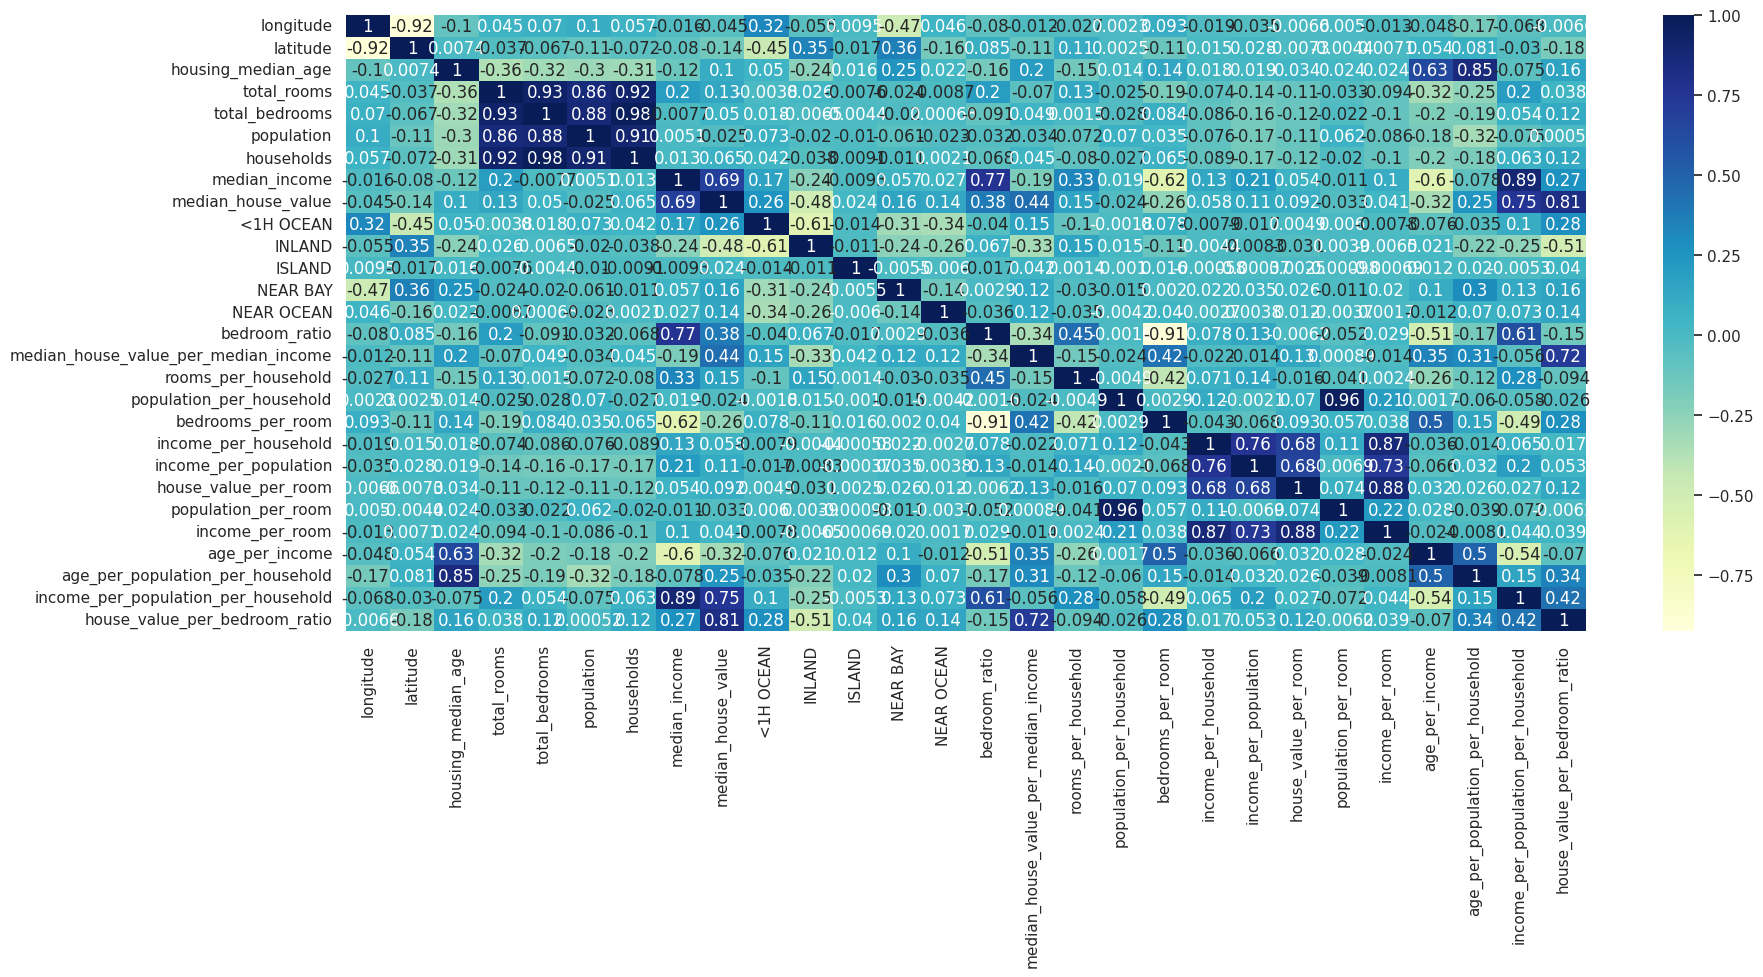

In [295]:
import seaborn as sb

sb.set(rc={'figure.figsize':(20,8)})
sb.heatmap(dflim.corr(), annot=True, cmap='YlGnBu')

In [298]:
#¿El resultado fue mejor o peor?
# PEOR

#¿Por qué crees que es así?
  # Debido a que estamos modificando los datos, añadiendo limites maximos a los valores de ciertas columnas,
  # esto ocasiona que el modelo le cueste predecir el valor de una casa debido a que los valores con los que nosotros
  # le estamos emseñando estan truncados desde un inicio.

# La IA no podra distinguir ciertos valores que pueden afectar a casas de mas de 50 años o casas que valen mas de 500,000.
# Esto ocasionara que no sea eficiente trabajar con datos limitados, ya que a la IA le costara predecir en un inicio las variables
# que nosotros querramos que prediga

#Ejemplo:
  # Al inicio solamente añadi la caracteristica de "bedroom_ratio" y la IA me saco un score de 0.65, haciendo que el % de acierto sea bajo
  # Para poder hacer que el Score de la IA suba tuve que añadir nuevas caracteristicas para que la IA tuviera mas datos para poder hacer
  # Predicciones mas precisas

# El modelo aprende con información incompleta o distorsionada.
# Por eso, sus predicciones son menos precisas, especialmente en los extremos (casas muy caras o muy antiguas).
# Esto afecta negativamente la capacidad de prediccion del modelo.